## Import libraries and data

First we need to import my libraries and the data we'll be using.

In [1]:
# to read and wrangle data
import pandas as pd

# for working with spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# to bring in census tract geometry
gdf_tracts = gpd.read_file('CES3June2018Update.shp')

In [3]:
gdf_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 71 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tract       8035 non-null   float64 
 1   pop2010     8035 non-null   int64   
 2   California  8035 non-null   object  
 3   ZIP         8035 non-null   int64   
 4   City        8035 non-null   object  
 5   Longitude   8035 non-null   float64 
 6   Latitude    8035 non-null   float64 
 7   CIscore     8035 non-null   float64 
 8   CIscoreP    8035 non-null   int64   
 9   ozone       8035 non-null   float64 
 10  ozoneP      8035 non-null   int64   
 11  pm          8035 non-null   float64 
 12  pmP         8035 non-null   int64   
 13  diesel      8035 non-null   float64 
 14  dieselP     8035 non-null   int64   
 15  drink       8035 non-null   float64 
 16  drinkP      8035 non-null   int64   
 17  pest        8035 non-null   float64 
 18  pestP       8035 non-null   int64   
 19

In [4]:
# trim the census tracts data to desired columns
gdf_tracts = gdf_tracts[['tract','California','White_pct','geometry']]

# rename the columns
gdf_tracts.columns = ['FIPS','County','White_pct','geometry']

In [5]:
gdf_tracts.head()

,FIPS,County,White_pct,geometry
0,6.083002e+09,Santa Barbara,31.3,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,Santa Barbara,17.4,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,Santa Barbara,40.9,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,Santa Barbara,71.9,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,Santa Barbara,65.4,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


In [6]:
# to bring in the California Power Plant locations
gdf_cpp=gpd.read_file('California_Power_Plants_MP Cleaned 3.1.21.csv')

In [7]:
gdf_cpp.head()

,Plant_ID,Plant_Label,MW,Gross_MWh,Net_MWh,General_Fuel,Status,Online_Year,REAT_ID,County,...,Congressional_District,CES30_PercentileRange,CES30_Percentile,Longitude,Latitude,Operation_Job,Capacity_Factor,Income_Percent,Project_Location,geometry
0,E0006,Burney Mtn. Power,11,,,Biomass,Operating,1985,C-3,Shasta,...,Congressional District 1,50-55%,51,-121.6395876,40.91000072,,,61,Neither Low Income Nor Disadvantaged Community,None
1,E0056,Mt. Lassen Power,11.4,,,Biomass,Operating,1985,C-4,Lassen,...,Congressional District 1,30-35%,30,-121.0178306,40.29741968,,,66,Neither Low Income Nor Disadvantaged Community,None
2,E0113,Commerce,11.5,,,Biomass,Operating,1986,F-11,Los Angeles,...,Congressional District 40,95-100% (highest scores),97,-118.1537915,33.99486138,,,75,Disadvantaged Community,None
3,E0026,Collins Pine,12,15398.03,8763,Biomass,Operating,1985,C-4,Plumas,...,Congressional District 1,20-25%,24,-121.2439679,40.30207759,,0.08313411,70,Neither Low Income Nor Disadvantaged Community,None
4,E0018,Chowchilla II,12.5,79062.01,67181,Biomass,Standby,2008,D-8,Madera,...,Congressional District 16,70-75%,72,-120.2488396,37.10692537,,0.61184882,48,Low Income,None


In [8]:
# trim the CPP data to desired columns
gdf_cpp = gdf_cpp[['Plant_ID','MW','County','Renewable_Energy','Longitude','Latitude']]

In [9]:
gdf_cpp.head()

,Plant_ID,MW,County,Renewable_Energy,Longitude,Latitude
0,E0006,11,Shasta,1,-121.6395876,40.91000072
1,E0056,11.4,Lassen,1,-121.0178306,40.29741968
2,E0113,11.5,Los Angeles,1,-118.1537915,33.99486138
3,E0026,12,Plumas,1,-121.2439679,40.30207759
4,E0018,12.5,Madera,1,-120.2488396,37.10692537


We've loaded and cleaned our data. Now we want to make maps to check how everything looks so far.

### Create maps of dataframes

In [10]:
# project to web mercator
gdf_tracts = gdf_tracts.to_crs(epsg=3857)

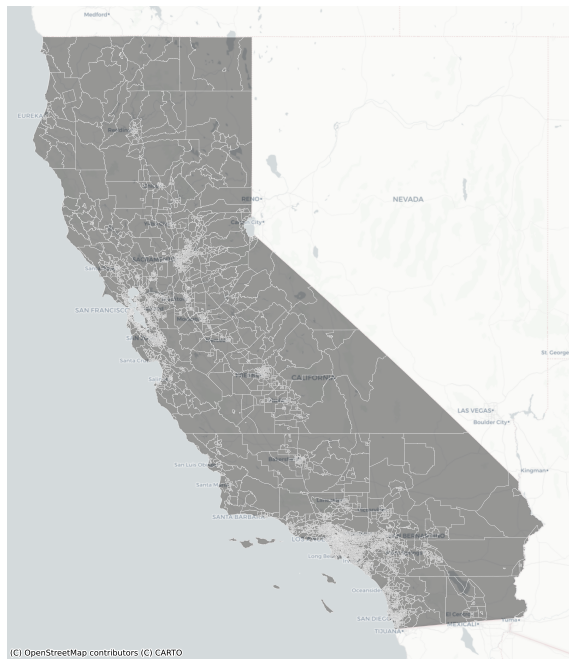

In [11]:
# plot census tracts
fig, ax = plt.subplots(figsize=(12,12))

gdf_tracts.plot(ax=ax,
         color='black', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [12]:
# Convert coordinates to floats

gdf_cpp.Longitude = gdf_cpp.Longitude.astype('float')
gdf_cpp.Latitude = gdf_cpp.Latitude.astype('float')

In [13]:
# Convert CPP data to geodataframe

gdf_cpp = gpd.GeoDataFrame(gdf_cpp, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(gdf_cpp.Longitude, gdf_cpp.Latitude))

gdf_cpp.head(5)

,Plant_ID,MW,County,Renewable_Energy,Longitude,Latitude,geometry
0,E0006,11,Shasta,1,-121.639588,40.910001,POINT (-121.63959 40.91000)
1,E0056,11.4,Lassen,1,-121.017831,40.297420,POINT (-121.01783 40.29742)
2,E0113,11.5,Los Angeles,1,-118.153791,33.994861,POINT (-118.15379 33.99486)
3,E0026,12,Plumas,1,-121.243968,40.302078,POINT (-121.24397 40.30208)
4,E0018,12.5,Madera,1,-120.248840,37.106925,POINT (-120.24884 37.10693)


In [14]:
# check crs type
gdf_cpp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
#reproject gdf_tracts to web mercator. 
gdf_tracts = gdf_tracts.to_crs(epsg=3857)

#reproject gdf_cpp to web mercator
gdf_cpp = gdf_cpp.to_crs(epsg=3857)

# check work
print(gdf_tracts.crs)

epsg:3857


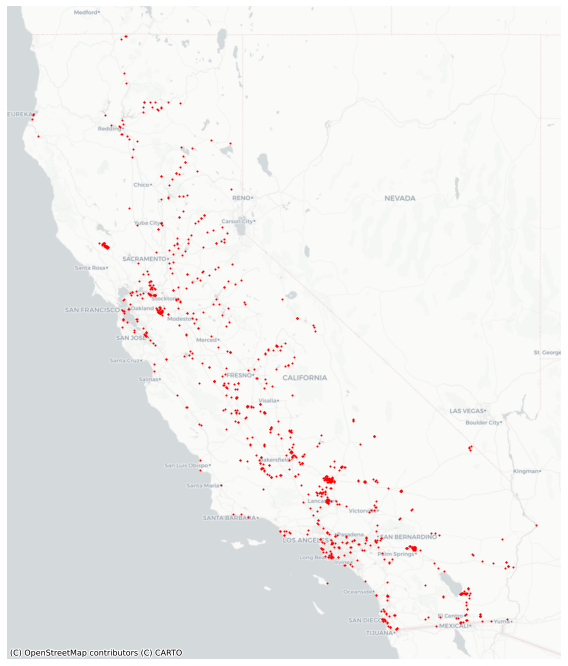

In [16]:
# map power plant locations
fig,ax = plt.subplots(figsize=(12,12))

gdf_cpp.plot(ax=ax,
             color='red',
             markersize=1)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

It looks like we have the right data. Now we're going to begin the spatial analysis.

## Spatial analysis

We're going to start our spatial statisticss. We need to start by creating new dataframes with counts for all power plants, for just clean energy plants, and for just fossil fuel plants, and then join them back to the main one.

In [17]:
# Spatial join of both datasets
join = gpd.sjoin(gdf_cpp, gdf_tracts, how='left')
join.head()

,Plant_ID,MW,County_left,Renewable_Energy,Longitude,Latitude,geometry,index_right,FIPS,County_right,White_pct
0,E0006,11,Shasta,1,-121.639588,40.910001,POINT (-13540856.952 4999075.840),2827.0,6.089013e+09,Shasta,80.7
1,E0056,11.4,Lassen,1,-121.017831,40.297420,POINT (-13471643.279 4909257.094),3103.0,6.035040e+09,Lassen,84.0
2,E0113,11.5,Los Angeles,1,-118.153791,33.994861,POINT (-13152819.905 4028112.056),6806.0,6.037532e+09,Los Angeles,2.7
3,E0026,12,Plumas,1,-121.243968,40.302078,POINT (-13496816.768 4909936.963),2313.0,6.063001e+09,Plumas,85.3
4,E0018,12.5,Madera,1,-120.248840,37.106925,POINT (-13386039.593 4454021.303),1952.0,6.039000e+09,Madera,49.6


In [18]:
# Check work
join.head(20)

,Plant_ID,MW,County_left,Renewable_Energy,Longitude,Latitude,geometry,index_right,FIPS,County_right,White_pct
0,E0006,11,Shasta,1,-121.639588,40.910001,POINT (-13540856.952 4999075.840),2827.0,6.089013e+09,Shasta,80.7
1,E0056,11.4,Lassen,1,-121.017831,40.297420,POINT (-13471643.279 4909257.094),3103.0,6.035040e+09,Lassen,84.0
2,E0113,11.5,Los Angeles,1,-118.153791,33.994861,POINT (-13152819.905 4028112.056),6806.0,6.037532e+09,Los Angeles,2.7
3,E0026,12,Plumas,1,-121.243968,40.302078,POINT (-13496816.768 4909936.963),2313.0,6.063001e+09,Plumas,85.3
4,E0018,12.5,Madera,1,-120.248840,37.106925,POINT (-13386039.593 4454021.303),1952.0,6.039000e+09,Madera,49.6
5,E0017,12.5,Madera,1,-120.248380,37.107263,POINT (-13385988.464 4454068.452),1952.0,6.039000e+09,Madera,49.6
6,E0007,12.5,Merced,1,-120.490505,37.187003,POINT (-13412941.718 4465204.759),5318.0,6.047001e+09,Merced,39.9
7,E0082,12.65,Lassen,1,-120.645383,40.408642,POINT (-13430182.558 4925503.963),3101.0,6.035040e+09,Lassen,75.5
8,E0243,13.39,Siskiyou,1,-122.376950,41.434311,POINT (-13622939.781 5076614.978),1139.0,6.093001e+09,Siskiyou,76.5
9,E0089,13.4,Monterey,1,-121.315610,36.416294,POINT (-13504791.908 4358054.953),153.0,6.053011e+09,Monterey,10.4


In [19]:
powerplants_by_tract = join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='powerplant_count')
powerplants_by_tract.head(20)

,FIPS,powerplant_count
0,6.029006e+09,33
1,6.001451e+09,25
2,6.029003e+09,19
3,6.029006e+09,19
4,6.029006e+09,15
5,6.025010e+09,15
6,6.097154e+09,14
7,6.095254e+09,13
8,6.065045e+09,13
9,6.029005e+09,12


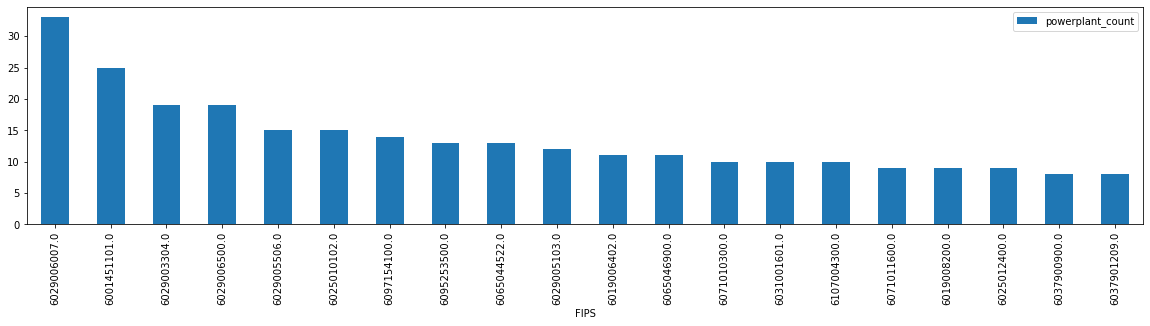

In [20]:
# Chart census tracts with the most power plants 

powerplants_by_tract[:20].plot.bar(figsize=(20,4),
                             x='FIPS',
                             y='powerplant_count')

Here, we have a chart of the census tracts organized by highest number of power plants.

In [21]:
# Join the summary table to main gdf
gdf_tracts=gdf_tracts.merge(powerplants_by_tract,on='FIPS')

In [22]:
# Check work
gdf_tracts.head(20)

,FIPS,County,White_pct,geometry,powerplant_count
0,6.011000e+09,Colusa,58.3,"POLYGON ((-13596135.250 4781220.115, -13595014...",1
1,6.011000e+09,Colusa,26.6,"POLYGON ((-13617812.940 4765808.759, -13617358...",1
2,6.103001e+09,Tehama,59.2,"POLYGON ((-13603222.851 4888123.896, -13602973...",1
3,6.103000e+09,Tehama,85.2,"POLYGON ((-13598180.189 4912134.917, -13597864...",1
4,6.083003e+09,Santa Barbara,64.7,"POLYGON ((-13363759.041 4101027.008, -13363704...",2
5,6.083003e+09,Santa Barbara,48.9,"POLYGON ((-13343861.127 4086987.322, -13343824...",1
6,6.083002e+09,Santa Barbara,52.6,"POLYGON ((-13367204.713 4179294.693, -13367167...",1
7,6.083002e+09,Santa Barbara,5.1,"POLYGON ((-13406850.927 4157523.436, -13406863...",1
8,6.025011e+09,Imperial,2.3,"POLYGON ((-12863235.460 3866335.408, -12863246...",1
9,6.025010e+09,Imperial,42.1,"POLYGON ((-12837517.299 3895899.553, -12836977...",1


### Map power plants by tract

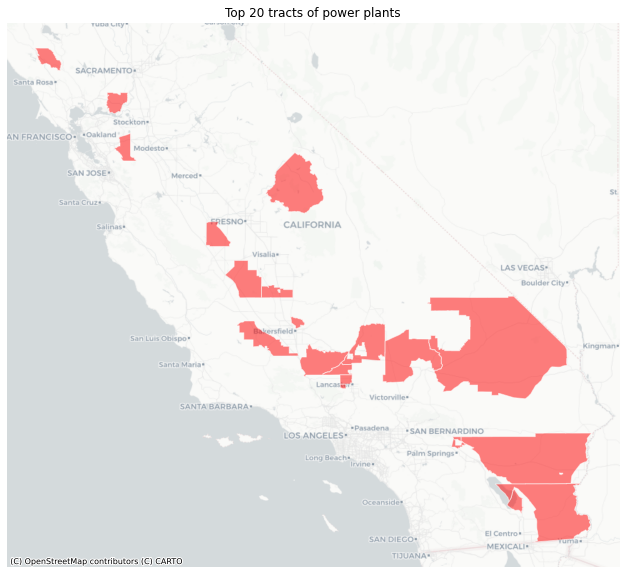

In [23]:
# map the top 20 census tracts
fig,ax = plt.subplots(figsize=(12,10))
gdf_tracts.sort_values(by='powerplant_count',ascending=False)[:20].plot(ax=ax,
                                                                 color='red',
                                                                 edgecolor='white',
                                                                 alpha=0.5,legend=True)

# title
ax.set_title('Top 20 tracts of power plants')

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

This shows the 20 census tracts with the most power plants in the state.

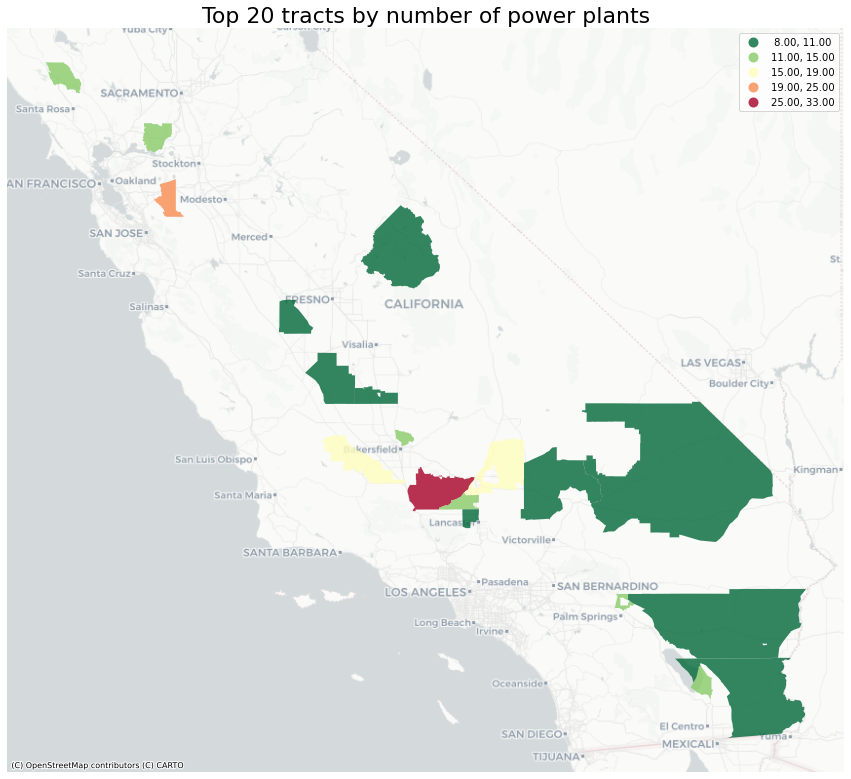

In [24]:
# map the top 20 census tracts sorted by number of power plants

fig,ax = plt.subplots(figsize=(15,15))

gdf_tracts.sort_values(by='powerplant_count',ascending=False)[:20].plot(ax=ax,
        column='powerplant_count',
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r',
        scheme='NaturalBreaks')

# turn axis off
ax.axis('off')

# title
ax.set_title('Top 20 tracts by number of power plants',fontsize=22)

# add basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

This is the same as the map above but we've sorted the census tracts by how many plants they have.

### Create separate dataframes for clean energy and fossil fuel plants

Moving on, we need to do the same thing for clean energy and fossil fuel plants.

In [25]:
# check size of original joined dataframe
join.shape

(871, 11)

In [26]:
# create dataframe for renewable energy
join_ce = join[join.Renewable_Energy != '0']

In [27]:
# check that it's smaller than the main one
join_ce.shape

(555, 11)

In [28]:
join_ce.head()

,Plant_ID,MW,County_left,Renewable_Energy,Longitude,Latitude,geometry,index_right,FIPS,County_right,White_pct
0,E0006,11,Shasta,1,-121.639588,40.910001,POINT (-13540856.952 4999075.840),2827.0,6.089013e+09,Shasta,80.7
1,E0056,11.4,Lassen,1,-121.017831,40.297420,POINT (-13471643.279 4909257.094),3103.0,6.035040e+09,Lassen,84.0
2,E0113,11.5,Los Angeles,1,-118.153791,33.994861,POINT (-13152819.905 4028112.056),6806.0,6.037532e+09,Los Angeles,2.7
3,E0026,12,Plumas,1,-121.243968,40.302078,POINT (-13496816.768 4909936.963),2313.0,6.063001e+09,Plumas,85.3
4,E0018,12.5,Madera,1,-120.248840,37.106925,POINT (-13386039.593 4454021.303),1952.0,6.039000e+09,Madera,49.6


In [29]:
# create dataframe of clean energy plants by census tract
ce_by_tract = join_ce.FIPS.value_counts().rename_axis('FIPS').reset_index(name='ce_count')
ce_by_tract.head(20)

,FIPS,ce_count
0,6.029006e+09,32
1,6.001451e+09,24
2,6.029006e+09,19
3,6.029006e+09,15
4,6.025010e+09,15
5,6.097154e+09,14
6,6.065045e+09,11
7,6.019006e+09,11
8,6.095254e+09,10
9,6.065047e+09,10


In [30]:
# join with main dataframe
gdf_tracts=gdf_tracts.merge(ce_by_tract,on='FIPS')

In [31]:
gdf_tracts.head(20)

,FIPS,County,White_pct,geometry,powerplant_count,ce_count
0,6.011000e+09,Colusa,26.6,"POLYGON ((-13617812.940 4765808.759, -13617358...",1,1
1,6.103000e+09,Tehama,85.2,"POLYGON ((-13598180.189 4912134.917, -13597864...",1,1
2,6.083002e+09,Santa Barbara,52.6,"POLYGON ((-13367204.713 4179294.693, -13367167...",1,1
3,6.025011e+09,Imperial,2.3,"POLYGON ((-12863235.460 3866335.408, -12863246...",1,1
4,6.025010e+09,Imperial,42.1,"POLYGON ((-12837517.299 3895899.553, -12836977...",1,1
5,6.025010e+09,Imperial,19.0,"POLYGON ((-12851597.545 3929163.460, -12849562...",7,6
6,6.025010e+09,Imperial,14.9,"POLYGON ((-12859618.003 3927789.488, -12859565...",15,15
7,6.025012e+09,Imperial,19.3,"POLYGON ((-12873136.308 3882124.325, -12871964...",3,3
8,6.025011e+09,Imperial,23.1,"POLYGON ((-12852709.515 3883147.124, -12852473...",2,1
9,6.025011e+09,Imperial,27.1,"POLYGON ((-12881733.512 3876375.159, -12881732...",2,2


In [32]:
# create dataframe of just fossil fuel plants
join_ff = join[join.Renewable_Energy != '1']

In [33]:
# check work
join_ff.shape

(316, 11)

In [34]:
# create dataframe of fossil fuel plants by census tract
ff_by_tract = join_ff.FIPS.value_counts().rename_axis('FIPS').reset_index(name='ff_count')
ff_by_tract.head(20)

,FIPS,ff_count
0,6.029003e+09,12
1,6.029005e+09,12
2,6.037532e+09,7
3,6.013306e+09,7
4,6.029003e+09,6
5,6.013309e+09,5
6,6.085505e+09,4
7,6.019008e+09,4
8,6.073010e+09,4
9,6.073020e+09,4


In [35]:
# merge with main dataframe
gdf_tracts=gdf_tracts.merge(ff_by_tract,on='FIPS')
gdf_tracts.head(20)

,FIPS,County,White_pct,geometry,powerplant_count,ce_count,ff_count
0,6.025010e+09,Imperial,19.0,"POLYGON ((-12851597.545 3929163.460, -12849562...",7,6,1
1,6.025011e+09,Imperial,23.1,"POLYGON ((-12852709.515 3883147.124, -12852473...",2,1,1
2,6.053011e+09,Monterey,62.2,"POLYGON ((-13441446.581 4343386.497, -13441280...",3,1,2
3,6.061021e+09,Placer,65.5,"POLYGON ((-13508286.674 4712305.621, -13507195...",3,1,2
4,6.059022e+09,Orange,48.7,"POLYGON ((-13108715.806 4019162.233, -13107658...",2,1,1
5,6.029005e+09,Kern,86.0,"POLYGON ((-13125362.229 4271348.637, -13125843...",4,2,2
6,6.029006e+09,Kern,77.3,"POLYGON ((-13201688.215 4180675.903, -13201685...",33,32,1
7,6.029003e+09,Kern,47.0,"POLYGON ((-13319116.920 4231940.423, -13318798...",19,7,12
8,6.067009e+09,Sacramento,71.3,"POLYGON ((-13472689.170 4634163.712, -13472673...",2,1,1
9,6.039000e+09,Madera,49.6,"POLYGON ((-13386442.391 4456803.938, -13383853...",3,2,1


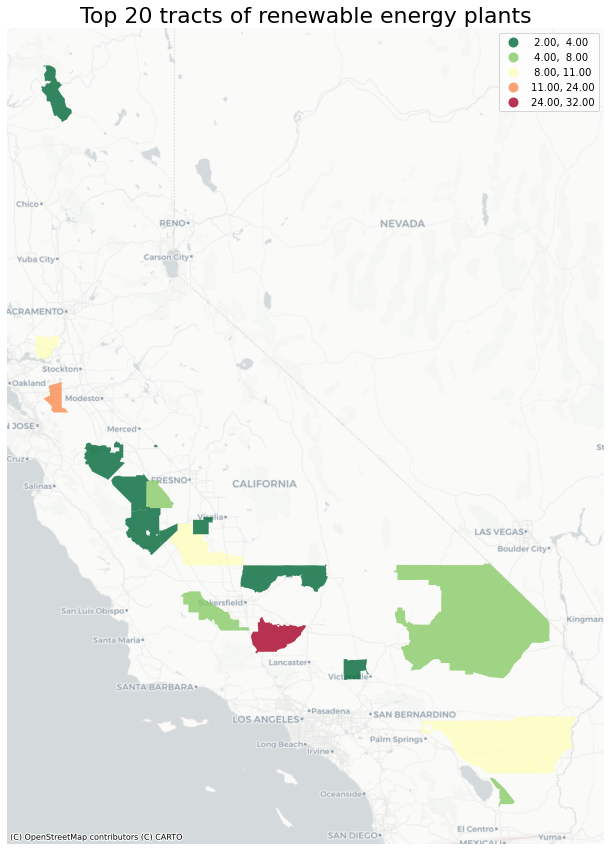

In [36]:
fig,ax = plt.subplots(figsize=(15,15))

gdf_tracts.sort_values(by='ce_count',ascending=False)[:20].plot(ax=ax,
        column='ce_count',
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r',
        scheme='NaturalBreaks')

ax.axis('off')
ax.set_title('Top 20 tracts of renewable energy plants',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

This map shows census tracts with the most clean energy power plants.

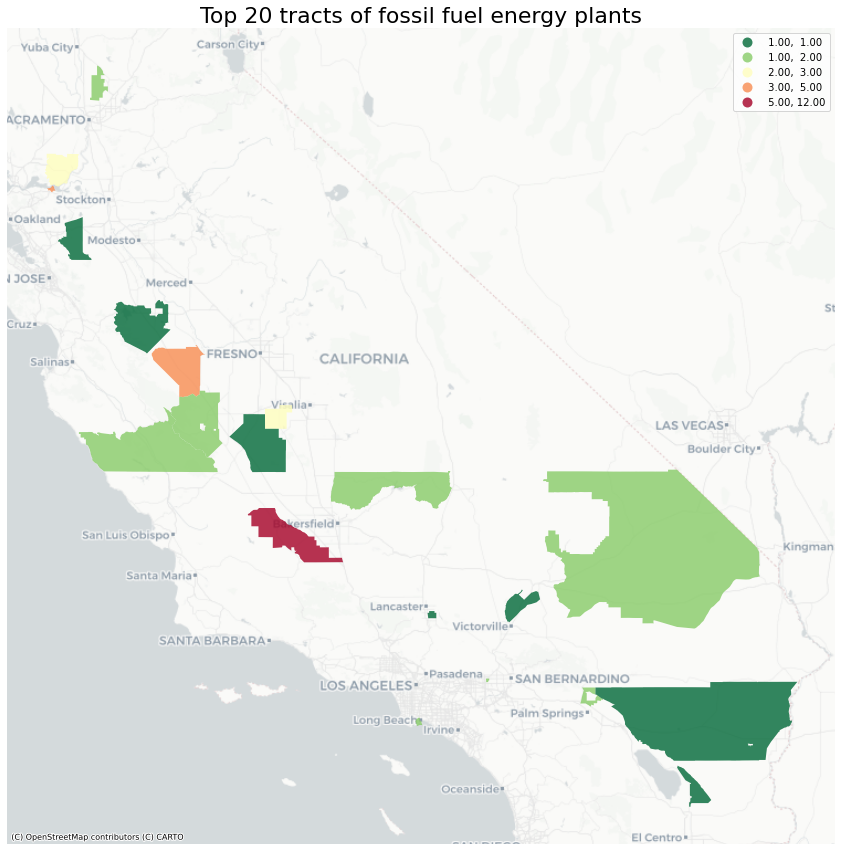

In [37]:
fig,ax = plt.subplots(figsize=(15,15))

gdf_tracts.sort_values(by='ff_count',ascending=False)[:20].plot(ax=ax,
        column='ff_count',
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r',
        scheme='NaturalBreaks')

ax.axis('off')
ax.set_title('Top 20 tracts of fossil fuel energy plants',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Here we have census tracts with the most fossil fuel power plants.

We've mapped the census tracts with the most total power plants, clean energy plants, and fossil fuel plants. It looks like there are some differences in which tracts have more power plants, but we can't be sure without doing some statistics. We need to move on to spatial autocorrelation.

## Spatial autocorrelation

In [38]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(gdf_tracts,k=8)

# Row-standardization
wq.transform = 'r'

In [39]:
# create a new column for the spatial lag
gdf_tracts['powerplant_count_lag'] = lps.weights.lag_spatial(wq, gdf_tracts['powerplant_count'])

In [40]:
# check work
gdf_tracts.sample(10)[['FIPS','County','White_pct','geometry','powerplant_count','powerplant_count_lag']]

,FIPS,County,White_pct,geometry,powerplant_count,powerplant_count_lag
27,6.047002e+09,Merced,35.6,"POLYGON ((-13446190.679 4461421.216, -13446193...",5,6.875
23,6.065045e+09,Riverside,45.7,"POLYGON ((-12964015.203 4033214.504, -12964105...",13,5.000
17,6.077001e+09,San Joaquin,6.0,"POLYGON ((-13502927.329 4571714.827, -13502708...",2,7.375
4,6.059022e+09,Orange,48.7,"POLYGON ((-13108715.806 4019162.233, -13107658...",2,7.625
19,6.071010e+09,San Bernardino,85.8,"POLYGON ((-12969174.750 4120566.186, -12969091...",2,5.750
15,6.019008e+09,Fresno,23.9,"POLYGON ((-13395966.219 4359759.405, -13391951...",5,6.000
12,6.019008e+09,Fresno,2.1,"POLYGON ((-13353783.590 4325732.720, -13353765...",5,6.625
16,6.077005e+09,San Joaquin,28.2,"POLYGON ((-13520110.494 4543012.639, -13520064...",2,7.375
7,6.029003e+09,Kern,47.0,"POLYGON ((-13319116.920 4231940.423, -13318798...",19,9.500
3,6.061021e+09,Placer,65.5,"POLYGON ((-13508286.674 4712305.621, -13507195...",3,7.250


In [41]:
# create a column that calculates the difference betwen powerplant counts and lag
gdf_tracts['powerplant_count_lag_diff'] = gdf_tracts['powerplant_count'] - gdf_tracts['powerplant_count_lag']

In [42]:
# sort by lag differences
gdf_tracts.sort_values(by='powerplant_count_lag_diff')

,FIPS,County,White_pct,geometry,powerplant_count,ce_count,ff_count,powerplant_count_lag,powerplant_count_lag_diff
5,6.029005e+09,Kern,86.0,"POLYGON ((-13125362.229 4271348.637, -13125843...",4,2,2,11.125,-7.125
20,6.071012e+09,San Bernardino,45.1,"POLYGON ((-13048016.445 4136888.240, -13048831...",2,1,1,8.500,-6.500
4,6.059022e+09,Orange,48.7,"POLYGON ((-13108715.806 4019162.233, -13107658...",2,1,1,7.625,-5.625
16,6.077005e+09,San Joaquin,28.2,"POLYGON ((-13520110.494 4543012.639, -13520064...",2,1,1,7.375,-5.375
17,6.077001e+09,San Joaquin,6.0,"POLYGON ((-13502927.329 4571714.827, -13502708...",2,1,1,7.375,-5.375
8,6.067009e+09,Sacramento,71.3,"POLYGON ((-13472689.170 4634163.712, -13472673...",2,1,1,7.375,-5.375
22,6.071002e+09,San Bernardino,24.8,"POLYGON ((-13081709.070 4041504.992, -13081753...",3,1,2,7.500,-4.500
18,6.071009e+09,San Bernardino,25.2,"POLYGON ((-13063522.694 4127335.366, -13062543...",3,2,1,7.500,-4.500
31,6.037980e+09,Los Angeles,46.7,"POLYGON ((-13142253.515 4117855.327, -13142242...",2,1,1,6.500,-4.500
32,6.037980e+09,Los Angeles,57.4,"POLYGON ((-13157643.323 3995998.491, -13157498...",3,1,2,7.500,-4.500


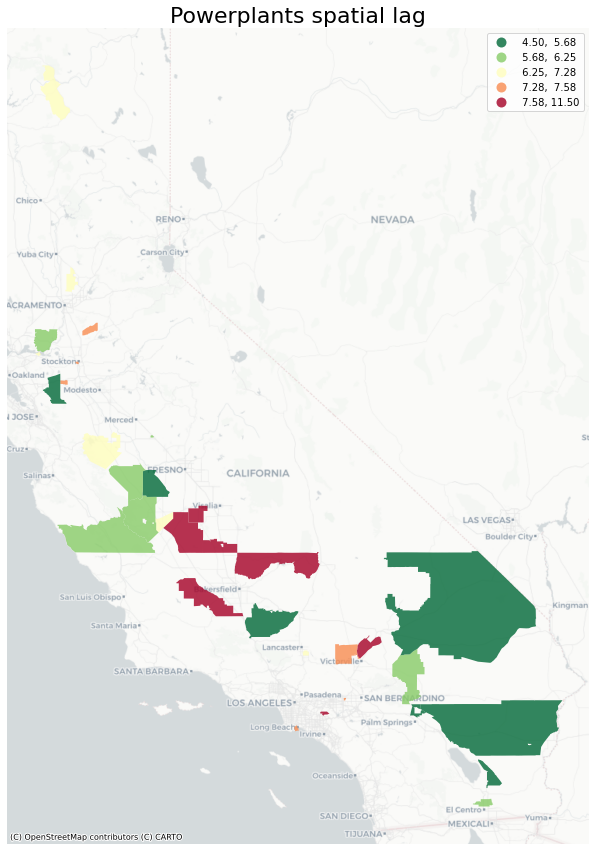

In [43]:
# plot the spatial lag with a chloropleth map
fig, ax = plt.subplots(figsize=(15, 15))

gdf_tracts.plot(ax=ax,
         figsize=(15,15),
         column='powerplant_count_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles')

ax.axis('off')
ax.set_title('Powerplants spatial lag',fontsize=22)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

This map shows how different these census tracts are from their neighbors by how many power plants they contain.

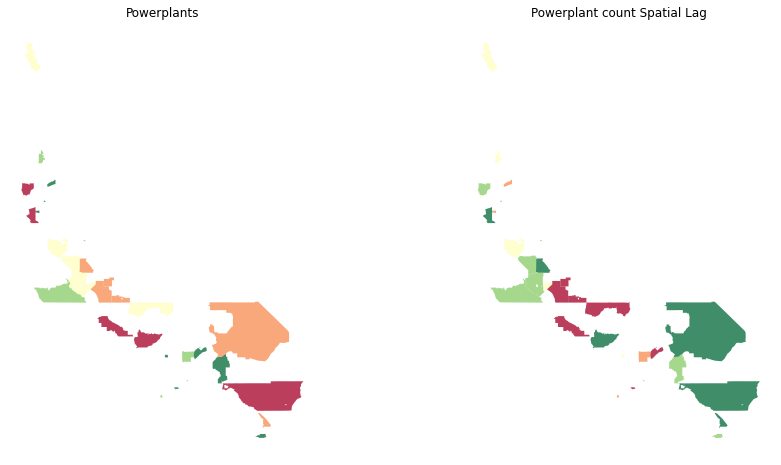

In [44]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
gdf_tracts.plot(ax=ax[0], # this assigns the map to the left subplot
         column='powerplant_count', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
           )


ax[0].axis("off")
ax[0].set_title("Powerplants")

# spatial lag map on the right
gdf_tracts.plot(ax=ax[1], # this assigns the map to the right subplot
         column='powerplant_count_lag', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75
           )

ax[1].axis("off")
ax[1].set_title("Powerplant count Spatial Lag")

plt.show()

These maps compare tracts with power plants to the spatial lag of those tracts. The map on the right shows that while some tracts may have a lot of plants, it's not necessarily that different compared to their immediate neighbors. Note: we're not sure why the basemap isn't showing up. We tried several times to add one but couldn't get it to show up.

So it looks like there's some spatial correlations in these data, but in order to know for sure we have to quantify the correlation. We'll make a Moran's Plot.

### Moran's Plot

In [45]:
y = gdf_tracts.powerplant_count
moran = Moran(y, wq)
moran.I

-0.04998852816335895

We have a Moran's I-value of -0.05.

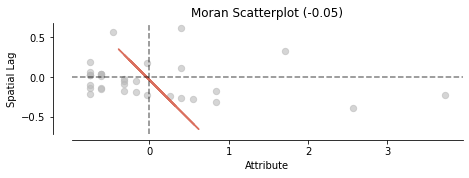

In [46]:
# Create a scatterplot of the Moran's plot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

We don't know if our value of -0.05 is statistically significant or not. To do that, we need to calculate the p-value.

In [47]:
moran.p_sim

0.442

This is a very high p-value, indicating that there's a 43% chance our data could be randomly arranged this way. It means our Moran's I-value is not statistically significant.

Though the spatial distribution of our data could easily happen randomly, we still want to look at where clusters are. We'll use the Local Indicators of Spatial Association (LISA) model. LISA classifies areas into four groups: high values near to high values (HH), Low values with nearby low values (LL), Low values with high values in its neighborhood, and vice-versa.

In [48]:
# calculate local moran values
lisa = esda.moran.Moran_Local(y, wq)

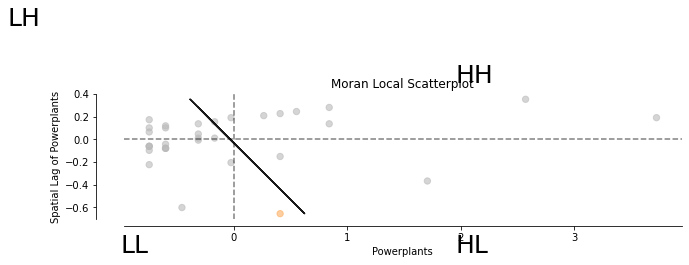

In [49]:
# Plot
fig,ax = plt.subplots(figsize=(10,15))

moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel("Powerplants")
ax.set_ylabel('Spatial Lag of Powerplants')

# add labels
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

In the scatterplot above, the yellow dots represent the census tract that have a P-value less that 0.05. In other words, we have one statisticaly significantly, spatially autocorrelated geographies. Below, we'll visualize this.

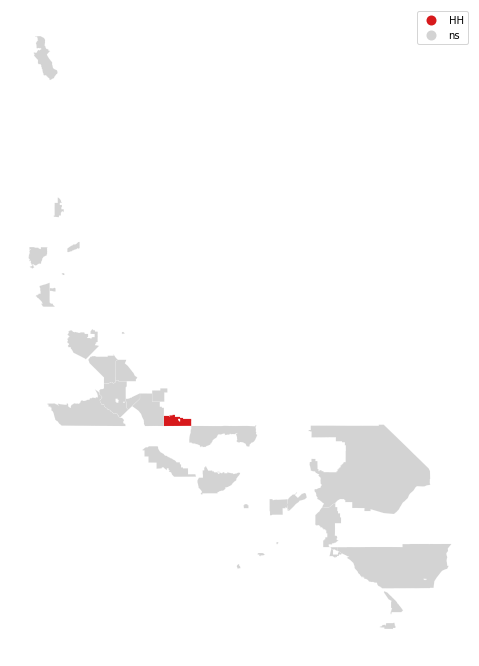

In [50]:
# use LISA cluster function
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(lisa, gdf_tracts, p=0.05, ax=ax)
plt.show()

Our one spatially significant census tract is located in the Central Valley. The number of power plants in this tract is (statistically) significantly higher than its neighbors.

We all contributed equally to this project. The group met on Sunday afternoon to complete the assignment and we spent several hours coding over Zoom.